In [1]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Methodology 1:

(NLTK) Text visualize thoughts of depression patients and suicide watch.

In [2]:
# Read necessary csv and clean it
text_viz = pd.read_csv(r'SuicideAndDepression_Detection.csv')
text_viz.dropna()
text_viz = text_viz[:5000]
text_viz.head()

,text,class
0,Does life actually work for most / non-depress...,depression
1,I found my friend's bodyIt was almost nine yea...,depression
2,Ex Wife Threatening SuicideRecently I left my ...,SuicideWatch
3,Am I weird I don't get affected by compliments...,teenagers
4,Finally 2020 is almost over... So I can never ...,teenagers


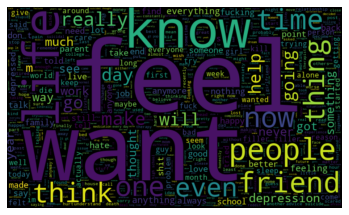

In [3]:
# Set stopwords
comment = ''
stop_words = set(stopwords.words("english"))

# Get the values
values = text_viz['text'].values[:5000]

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment += ' '.join(tokens)+' '
    
# Run WordCloud
textwordcloud = WordCloud(width=750,height=450,max_words=1000).generate(comment)

# Plot WordCloud
plt.axis("off")
plt.imshow(textwordcloud, interpolation="bilinear")
plt.show()

# Save as image
textwordcloud.to_file('NLTK1.png')

In [4]:
# Update stopwords
new_stopwords = ["I'm", "like","I've","one",'me.','I','My','i',"i’m"]
new_stopwords_list = stop_words.union(new_stopwords)

In [5]:
# show all stop words
new_stopwords_list

{'I',
 "I'm",
 "I've",
 'My',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'i’m',
 'just',
 'like',
 'll',
 'm',
 'ma',
 'me',
 'me.',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only',
 'or',
 'othe

In [6]:
# split the texts and get the word frequency count and store to a new data frame
text_split = text_viz['text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in new_stopwords_list))
only_text = text_split.str.split(expand=True).stack().value_counts()
only_text = pd.DataFrame(only_text)

# make the original index into a column called 'words'
only_text['words'] = only_text.index.str.lower()

# define a function that remove stopwords again
def x(word):
    if word not in stopwords.words('english'):
        return word
    else:
        return np.nan
    
# create a column and store the cleaned data
only_text['words_clean'] = only_text.words.apply(x)

# drop nan value
only_text = only_text.dropna()

# reset index (bcuz i dont like the index start from 0 )
only_text.index = np.arange(1,len(only_text)+1)

# show data
only_text.head()

,0,words,words_clean
1,3801,feel,feel
2,3319,want,want
3,3258,know,know
4,2932,get,get
5,2339,really,really


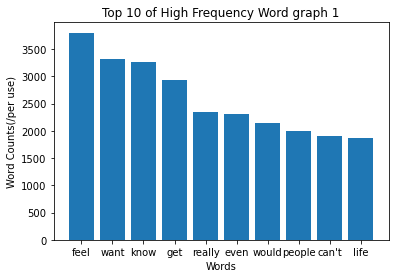

In [7]:
# set x_axis and y_axis
x = only_text['words_clean'][:10]
y = only_text[0][:10]

# plot the bar
plt.bar(x, y)
plt.title('Top 10 of High Frequency Word graph 1')
plt.xlabel('Words')
plt.ylabel('Word Counts(/per use)')

# Save as image
plt.savefig('WordFreq1.png')

#### Because I don't want to define the thoughts of them in just one dataset, so I go aheand and found another text dataset and compare.

In [8]:
# Read necessary csv and clean it
text_viz2 = pd.read_csv('name.csv')

# drop nan value and store to new data frame
text_viz2 = (text_viz2['text']).dropna()
text_viz2 = pd.DataFrame(text_viz2).astype(str)

# show data
text_viz2.head()

,text
0,I have to put this in writing somehow so I sti...
1,I've made my peace with the fact that I'm goin...
2,I really want help now i just cant so this any...
3,I can't think of any reason to stay. I have no...
5,"Hi, it's my first post here, I'm new in this c..."


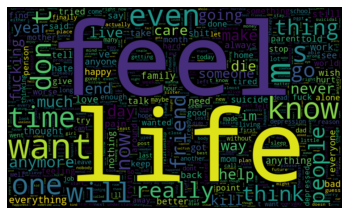

In [9]:
# Set stopwords
comment = ''
stop_words = set(stopwords.words("english"))

# Get the values
values = text_viz2['text'].values[:]

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment += ' '.join(tokens)+' '
    
# Run WordCloud
textwordcloud2 = WordCloud(width=750,height=450,max_words=1000).generate(comment)

# Plot WordCloud
plt.axis("off")
plt.imshow(textwordcloud2, interpolation="bilinear")
plt.show()

# Save as image
textwordcloud.to_file('NLTK2.png')

In [10]:
# split the texts and get the word frequency count and store to a new data frame
text_split2 = text_viz2['text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in new_stopwords_list))
only_text2 = text_split2.str.split(expand=True).stack().value_counts()
only_text2 = pd.DataFrame(only_text2)

# make the original index into a column called 'words'
only_text2['words'] = only_text2.index.str.lower()

# define a function that remove stopwords again
def z(words):
    if words not in new_stopwords_list:
        return words
    else:
        return np.nan
    
# create a column and store the cleaned data
only_text2['words_clean'] = only_text2.words.apply(z)

# drop nan values
only_text2 = only_text2.dropna()

# reset index (again, bcuz i dont like the index start from 0 )
only_text2.index = np.arange(1,len(only_text2)+1)

# show data
only_text2.head()

,0,words,words_clean
1,354,want,want
2,314,feel,feel
3,283,get,get
4,280,even,even
5,255,know,know


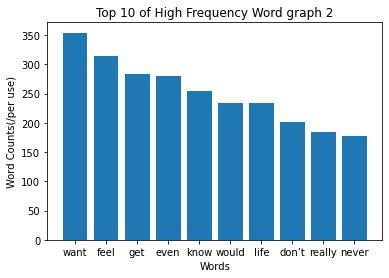

In [11]:
# assign x_axis and y_axis
x2 = only_text2['words_clean'][:10]
y2 = only_text2[0][:10]

# plot bar
plt.bar(x2, y2)
plt.title('Top 10 of High Frequency Word graph 2')
plt.xlabel('Words')
plt.ylabel('Word Counts(/per use)')

# Save as image
plt.savefig('WordFreq2.png')